In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define the encoder
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.encoder(x)
        return x

# Define the decoder
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.decoder(x)
        x = x.view(-1, 1, 28, 28)
        return x

# Combine encoder and decoder to create autoencoder
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
device = torch.device("cuda")
# Initialize the autoencoder
autoencoder = AutoEncoder().to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
print("Started Training")
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for data in trainloader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs = autoencoder(inputs.to(device))
        loss = criterion(outputs, inputs.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, running_loss / len(trainloader)))

print('Finished Training')

# Save the trained model


Started Training
Epoch [1/10], Loss: 0.9377
Epoch [2/10], Loss: 0.9254
Epoch [3/10], Loss: 0.9254
Epoch [4/10], Loss: 0.9254
Epoch [5/10], Loss: 0.9254
Epoch [6/10], Loss: 0.9254
Epoch [7/10], Loss: 0.9254
Epoch [8/10], Loss: 0.9254
Epoch [9/10], Loss: 0.9254
Epoch [10/10], Loss: 0.9254
Finished Training


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define the encoder
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.encoder(x)
        return x

# Define the decoder
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.Linear(10, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.decoder(x)
        x = x.view(-1, 1, 28, 28)
        return x

# Combine encoder and decoder to create autoencoder
class VariationalAutoEncoder(nn.Module):
    def __init__(self):
        super(VariationalAutoEncoder, self).__init__()
        self.encoder = Encoder()
        self.mean = nn.Linear(32,10)
        self.std = nn.Linear(32,10)
        self.decoder = Decoder()

    def forward(self, x):
        x = self.encoder(x)
        mean = self.mean(x)
        std = self.std(x)
        z = mean + std * torch.randn_like(std)
        x = self.decoder(z)
        return x, mean, std

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor()
    # transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

device = torch.device("cuda")
# Initialize the autoencoder
autoencoder = VariationalAutoEncoder()

# Define loss function and optimizer
def criterion(pred,y,mean, logvar):
    re = nn.functional.binary_cross_entropy(pred, y, reduction = 'sum')
    kld = -0.5*torch.sum(1+logvar - mean.pow(2) - logvar.exp())
    return re + kld
optim = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for data in trainloader:
        inputs, _ = data
        inputs = inputs
        optim.zero_grad()
        outputs, mean, std = autoencoder(inputs.view(64,-1))
        loss = criterion(outputs, inputs, mean, std)
        loss.backward()
        optim.step()
        running_loss += loss.item()
    print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, running_loss / len(trainloader)))

print('Finished Training')



Epoch [1/10], Loss: 12259.0868
Epoch [2/10], Loss: 8893.5192
Epoch [3/10], Loss: 7773.3711
Epoch [4/10], Loss: 7266.3588
Epoch [5/10], Loss: 7015.4940
Epoch [6/10], Loss: 6766.0795
Epoch [7/10], Loss: 6525.6534
Epoch [8/10], Loss: 6372.7353
Epoch [9/10], Loss: 6250.8713
Epoch [10/10], Loss: 6123.8647
Finished Training


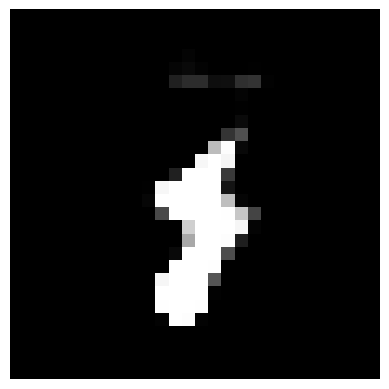

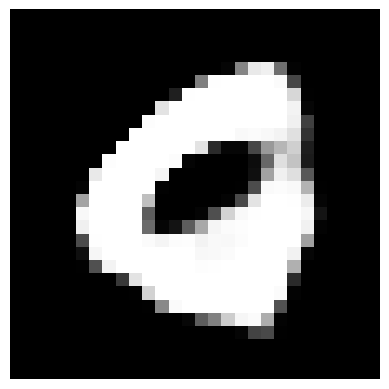

In [5]:
import matplotlib.pyplot as plt
def generate():
    mean = torch.zeros((1,10))
    var = torch.ones((1,10))
    z = mean + var * torch.randn_like(var)
    xDecoded = autoencoder.decoder(z)
    digit = xDecoded.detach().reshape(28,28)
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
    plt.show()
generate()
generate()
    